# IMAGE CLASSIFICATION PROJECT: Using TensorFlow 2 and Keras to train a neural network to read handwritten digits and how to optimize its accuracy.

In this project we will create and train a neural network to read handwritten digits, we will be using the well-known MNIST dataset for that purpose. 

The main objective of this project, though, will be exploring ways on how to optimize this neural network to get the best accuracy score possible, using hyperparameter tuning, different methods of regularization and optimization, for that purpose.

## Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

### Loading the dataset:

In [ ]:
mnist = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Splitting the Dataset into training sets and test sets:

In [ ]:
(X_full_train, y_full_train), (X_test, y_test) = mnist 

In [ ]:
X_full_train.shape

(60000, 28, 28)

### Normalizing the data:

We divide the dataset once more, this time the training set, one for training purposes and the other for validation purposes. This will help us with the improvement of the accuracy score later on.

Then we will normalize the data dividing the input data in both sets by 255, since the original values are between 0 and 255 this will scale them to be between 0 and 1.

In [ ]:
X_train, X_valid = X_full_train[:5000]/255, X_full_train[5000:]/255
y_train, y_valid = y_full_train[:5000], y_full_train[5000:] 

### Setting labels for the output data

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Creating and Training the ANN (Artificial Neural Network)

We will start first, using a simple architecture for our ANN. For the **activation function of the middle layers** our choice is a **ReLU function** as they normally work well for this type of ANNs.

In the **output layer** it's necessary to use a **softmax function** as our activation function, given that we are dealing with a classification problem and we will need to classify in more than two categories (in this case 10 categories -numbers 0 to 9-).

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


Now it's time to train our model, for the **optimizer** we will be using the **'sgd'**, which will complete the gradient descent using momentum.

The **loss function** will be the **sparse categorical crossentropy function** that is used for classification in multiple categories.

For the **metric** we will be using the **accuracy score** (correctly classified data over total data).

In [ ]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, verbose = 0)

In [ ]:
# Let's check the accuracy score:

model.evaluate(X_train, y_train)
model.evaluate(X_valid, y_valid)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.9108


[0.328321248292923, 0.9108363389968872]

The accuracy score is 0.9043 using the validation data, there is still room for imprevement.

Plotting the accuracy performance after training our ANN.

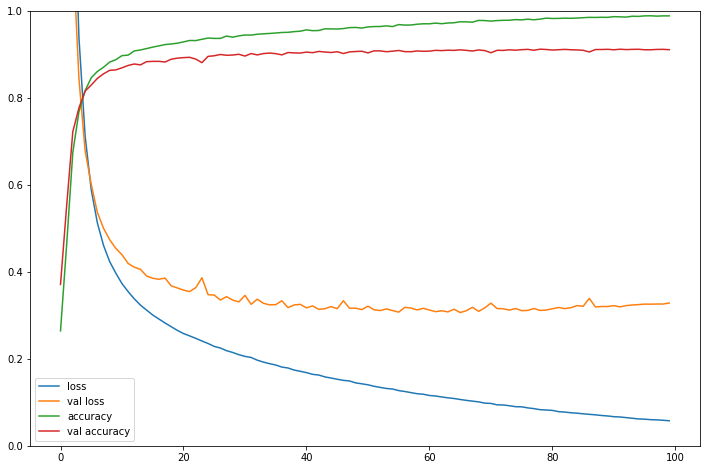

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m.history['loss'], label = 'loss')
plt.plot(m.history['val_loss'], label = 'val loss')
plt.plot(m.history['accuracy'], label = 'accuracy')
plt.plot(m.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

Output given:

In [ ]:
# Let's see the first 10 results of the output it gave us
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2) 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Let's translate the outcome using our labels
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
y_new = y_test[:10]
y_new

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

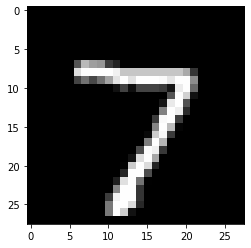

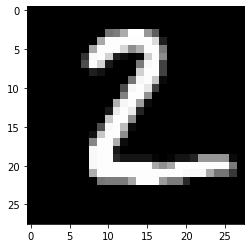

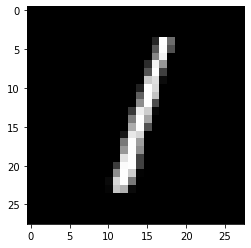

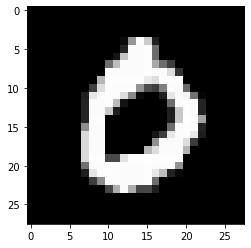

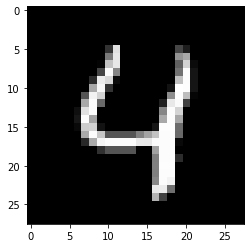

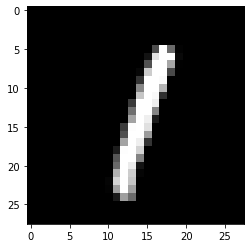

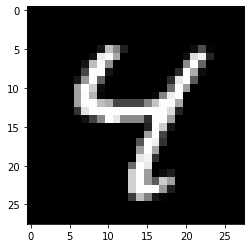

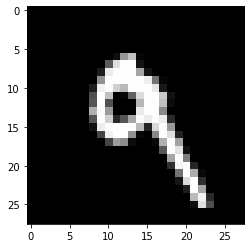

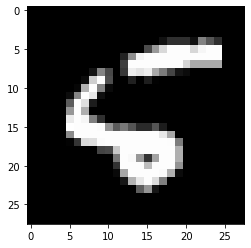

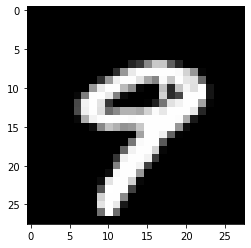

In [ ]:
# Now let's see some numbers and how our model guessed them
for image in X_new:
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.show()

In this sample we chose, the result was 10/10 numbers guessed correctly.

#### Conclusion:
As we saw, our model performed way better in the training set (0.99 accuract score) than in the validation set (0.91). In order to narrow down the difference between the validation set and training set performances we should add regularizations. The difference between the accuracy in the training set and the validation set is ~0.09,  we have a case of severe overfitting and therefore we will use **'l2' regularization**, that will squeeze the weights generated after every backpropagation towards 0, and a **0.20 dropout regularization** that will switch off 20% of the neurons randomly with every backpropagation preventing the overspecialization of neurons and ultimately resulting in less overfitting.

In [ ]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape = [28,28]))
model2.add(keras.layers.Dense(20, activation = 'relu', kernel_regularizer='l2'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(20, activation = 'relu', kernel_regularizer='l2'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model2.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m2 = model2.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, verbose = 0)

In [ ]:
# Checking the accuracy score of the training and validation sets:

model2.evaluate(X_train, y_train)
model2.evaluate(X_valid, y_valid)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.5670 - accuracy: 0.8978


[0.5669675469398499, 0.8978363871574402]

As we can see, adding that many regularizations brought down both accuracy scores (training and validation), but it, indeed, narrowed down the differences between the two by 2 approximately.

We should find some other way to narrow down this difference without resulting in worsening the accuracy score.

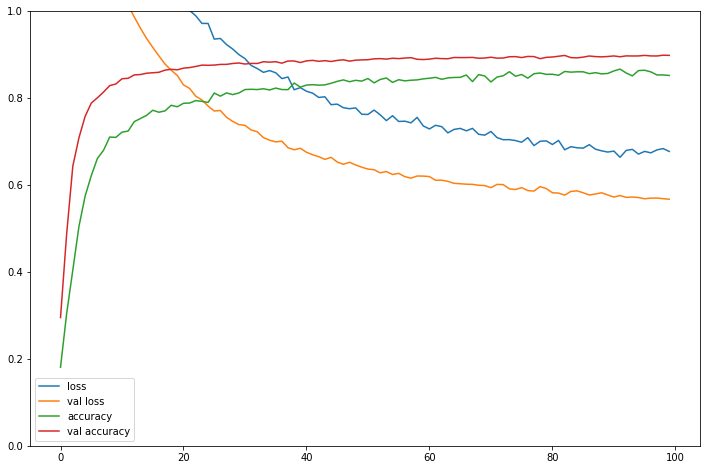

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m2.history['loss'], label = 'loss')
plt.plot(m2.history['val_loss'], label = 'val loss')
plt.plot(m2.history['accuracy'], label = 'accuracy')
plt.plot(m2.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

In the graphic representation we can also see that there is still room for improvement when it comes to accuracy, as the cost doesn't seem to have reached the plateau, we will need **more iterations** and also, this time the training set didnt perform that well either, as we explained above, so let's make the **ANN wider** adding more hidden layers. 

As we are going to need more iterations it will be also interesting to try another algorithm for optimization, let's try now with **'adam' algorithm for optimization**.

In [ ]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape = [28,28]))
model3.add(keras.layers.Dense(128, activation = 'relu', kernel_regularizer='l2'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer='l2'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [ ]:
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m3 = model3.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 250, verbose = 0)

In [ ]:
model3.evaluate(X_train, y_train)
model3.evaluate(X_valid, y_valid)

1719/1719 [==============================] - 4s 3ms/step - loss: 0.4005 - accuracy: 0.9338


[0.4005335569381714, 0.9338363409042358]

We managed to rise both accuracy scores, but the difference has widened again, from 2 percentage points to 5 percentage points approximately, but still not as much as our first model where the difference in percentage points was of 9 points approximately. We're moving in the right direction.

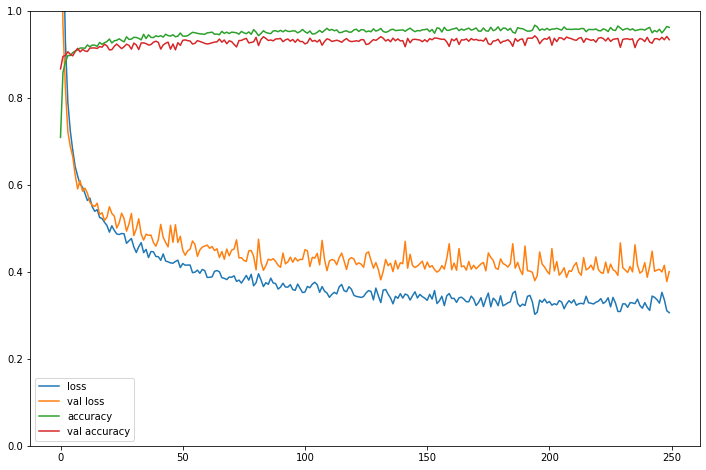

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m3.history['loss'], label = 'loss')
plt.plot(m3.history['val_loss'], label = 'val loss')
plt.plot(m3.history['accuracy'], label = 'accuracy')
plt.plot(m3.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

This irregularities we can find in the different curves means that our model is overshooting when it's near finding the optimal parameters, so we need to **make our learning rate smaller**. 

If we make it smaller we will also have to **increase the number of iterations**, given that our model seems to plateau at around 100 iterations, if we make our learning rate 10 times smaller, we will need to multiply this number of iterations by 10 as well, so we will train our model using 1,000 epochs but that would make our model inefficient time-wise, so let's try with 500 iterations. We will also try **increasing the dropout by 0.1** to try to make the difference between the training set and validation set even smaller.

In [ ]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape = [28,28]))
model4.add(keras.layers.Dense(128, activation = 'relu', kernel_regularizer='l2'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer='l2'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001) # This sets our learning rate to 0.0001

In [ ]:
model4.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
m4 = model4.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 500, verbose = 0)

In [ ]:
model4.evaluate(X_train, y_train)
model4.evaluate(X_valid, y_valid)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.9396


[0.33829784393310547, 0.9396181702613831]

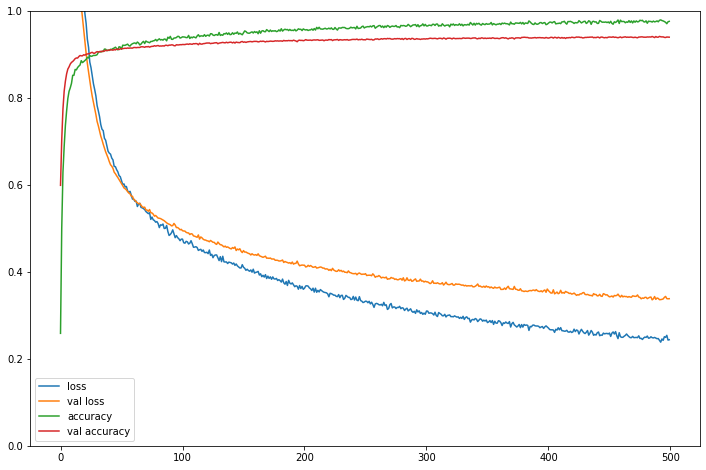

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(m4.history['loss'], label = 'loss')
plt.plot(m4.history['val_loss'], label = 'val loss')
plt.plot(m4.history['accuracy'], label = 'accuracy')
plt.plot(m4.history['val_accuracy'], label = 'val accuracy')
plt.gca().set_ylim(0,1)
plt.legend() 

We have improved our artificial neural network model in more than 4 percentage points over our first model. The training set accuracy reached 0.9948 and the validation accuracy score reached almost 0.94.

There is still overfitting, but in general the model has been improved. Let's check it now using the test set.

In [ ]:
# Now that we have a model that we're happy with, let's test it with the test set
model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 16.4615 - accuracy: 0.9196


[16.461467742919922, 0.9196000099182129]

An accuracy score of almost 0.92, not bad, but there is still room for improvement.